In [36]:
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim ## 损失模块和优化器模型
from torch.autograd import Variable
import torch

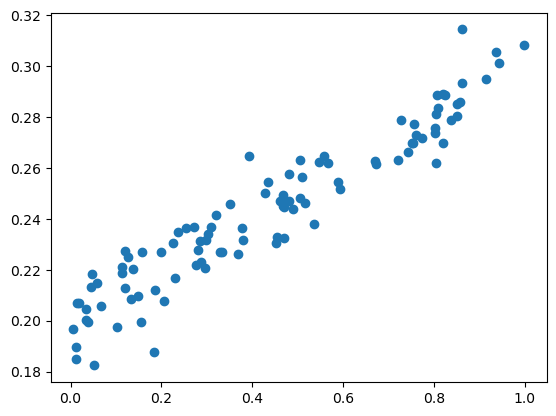

In [ ]:
x_data = np.random.rand(100)
noise = np.random.normal(0,0.01,x_data.shape) # 正态分布的噪音
y_data = x_data*0.1 + 0.2 + noise

plt.scatter(x_data,y_data)
plt.show()

In [3]:
# pytorch在默认情况下是对一个批次的数据来进行处理的
# 一般来说一次选几十个数据到网络中进行训练，不是一个个传进去的

x_data = x_data.reshape(-1,1) #-1 的意思是自动匹配，这里代表行数根据情况来自动匹配，这里的-1就代表100，因为生成了100个随机数
y_data = y_data.reshape(-1,1)

In [ ]:
# 把numpy数据变成tensor，这样才能在pytorch里面进行训练
x_data = torch.FloatTensor(x_data)
y_data = torch.FloatTensor(y_data)
# 变成变量
inputs = Variable(x_data) # 这个是数据的输入
target = Variable(y_data) # 这个是数据的输出



torch.float32

In [ ]:
# 构建神经网络模型（这里是定义类）
# 这个过程是有一定的规范的：首先先定义一个类
# 一般把网络中具有可学习参数的层放在__init__()中，在这里就是全连接层

class LinearRegression(nn.Module): #LinearRegression是可以修改的类的名字，它要继承nn.Module这个类
    # 初始化方法——定义网络结构
    def __init__(self):
        # 初始化nn.Module
        super(LinearRegression, self).__init__() #在定义自己的网络结构的时候，要先初始化父类，即初始化nn.Module
        self.fc = nn.Linear(1,1) # 输入一个神经元，输出一个神经元，输入x去看y的值，上网去查vscode里如何看函数说明。
        
    # 前向传播——定义网络计算
    # 这里的x表示整个网络的输入
    def forward(self,x):
        out = self.fc(x)
        return out
    # 这里整体的意思是，网络收到 x（input），随后把这个x经过全连接层得到output，即线性回归
    # 我们只需要写forward前向计算，不需要写bp反向传播，它会自动计算梯度

In [10]:
# 定义模型——实例化以上的模型
model = LinearRegression()
# 定义代价函数
mse_loss = nn.MSELoss()
# 定义优化器
optimizer = optim.SGD(model.parameters(), lr=0.1) # 把模型的参数传入进去，再定义学习率

In [12]:
# 观察参数的方式 遍历里面的每个参数给出值
for name, parameters in model.named_parameters():
    print('name:{}, param:{}' .format(name, parameters))

name:fc.weight, param:Parameter containing:
tensor([[-0.8985]], requires_grad=True)
name:fc.bias, param:Parameter containing:
tensor([0.1068], requires_grad=True)


# 从这里开始就要进行模型的训练了！
模型的训练是一次选几十个输进去，并不是一个，也不是全部
但在这里面，是全部输入进去进行训练了 

In [ ]:
for i in range(1001):
    out = model(inputs) # 把数据传给模型，就得到预测值，inputs和outputs使用Variable就已经定义了
    # 计算loss
    loss = mse_loss(out, target)
    # 梯度清0
    optimizer.zero_grad()
    # 计算梯度
    loss.backward()
    # 修改权值
    optimizer.step()
    if i%200 == 0:
        print(i,loss.item()) # 这里就是把item给变成python的数值

0 0.360636442899704
200 0.0003070375823881477
400 9.3472859589383e-05
600 9.257618512492627e-05
800 9.257243073079735e-05
1000 9.257240890292451e-05


<function matplotlib.pyplot.show(close=None, block=None)>

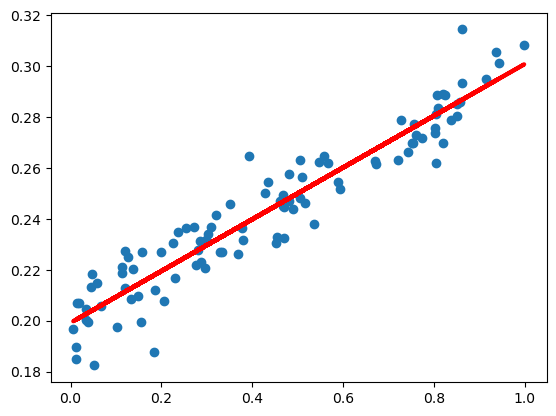

In [ ]:
y_pred = model(inputs) # 模型给输入，得到的就是输出，但是得到的是tensor类型的输出，还要转换一下
plt.scatter(x_data, y_data)
y_pred_data = y_pred.data.numpy() # data是把数据给取出来了，类型还是torch('float')，使用numpy（）这个方法，是彻底转化成了float类型
plt.plot(x_data, y_pred_data,'r-',lw=3)
plt.show

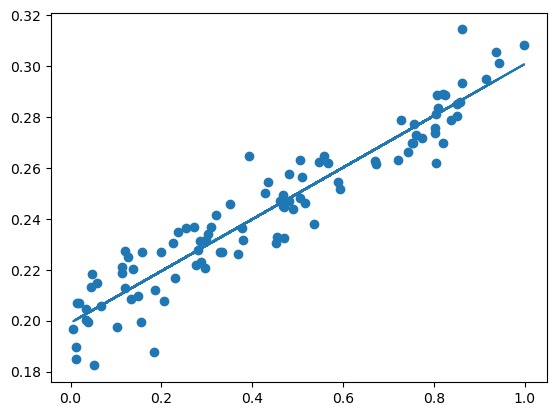

In [ ]:
# 假设 inputs 是你的输入数据
y_pred = model(inputs)  # 计算模型输出

# 处理 PyTorch tensor -> NumPy
# 你的错误是 PyTorch 张量 (Tensor) 需要梯度 (requires_grad=True)，但 NumPy 不支持直接转换这种张量。因此你需要 先 detach() 再转换为 NumPy,即要先分类出来
# 如果你的模型在 GPU 上运行，y_pred 也是 GPU 张量，那么你需要先 .cpu() 再 .detach().numpy()：
y_pred1 = y_pred.cpu().detach().numpy()  # 先迁移到 CPU，再转换

# 绘图
plt.scatter(x_data, y_data)
plt.plot(x_data, y_pred1)
plt.show()

# 总体回顾！
导入包——准备好数据——变成列向量，成为tensor——转化成pytorch里的变量
定义网络结构（结构+计算）
实例化网络结构，即model,代价函数，优化器
循环训练100次，计算，求loss，梯度清0，梯度计算，修改权值
最后画图